#### Prerocessing File for (products, restaurants, movies) Datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# for text cleaning
import re
import string
from nltk.corpus import stopwords
import os
import warnings
warnings.simplefilter("ignore")
import nltk

In [203]:
pd.set_option('display.max_colwidth', None)

In [26]:
df = pd.read_csv("C:/Users/raimn/mlproject/Res.csv")
df.head()

,text,polarity
0,٦٠ \nاللي يوصل ميلان ولا يمر هالمطعم اعتبرة خس...,1
1,رااااائع \nالمطعم أكله لذيذ جداً والعاملين متع...,1
2,جيد \nمطعم جيد\nالعاملين فيه ودون\nبالنسبة للأ...,1
3,مطعم جميل جدااااا \nمأكولات بجد جميله جداااااا...,1
4,مطعم مصري.. \nالسلام عليكم.. المطعم ممتاز جداً...,1


In [27]:
df.iloc[0:50]

,text,polarity
0,٦٠ \nاللي يوصل ميلان ولا يمر هالمطعم اعتبرة خس...,1
1,رااااائع \nالمطعم أكله لذيذ جداً والعاملين متع...,1
2,جيد \nمطعم جيد\nالعاملين فيه ودون\nبالنسبة للأ...,1
3,مطعم جميل جدااااا \nمأكولات بجد جميله جداااااا...,1
4,مطعم مصري.. \nالسلام عليكم.. المطعم ممتاز جداً...,1
5,"Buona scelta gluten-free \nIl ristorante ""Il G...",0
6,مطعم هندي بميلان \nمطعم هندي لذيذ بميلان وقريب...,1
7,مطعم هندي ممتاز بأكله واستقباله وضيافته \nالمط...,1
8,رائع \nمطعم هندي ماكولاته لذيذه وهو قريب من ال...,1
9,مطعم ممتاز \nانا سافرت إيطاليا و أكلت بيتزا و ...,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10970 entries, 0 to 10969
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      10970 non-null  object
 1   polarity  10970 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 171.5+ KB


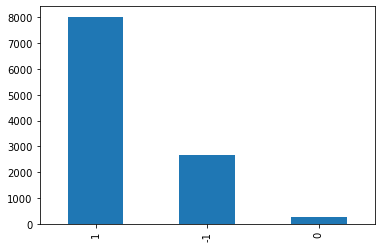

In [29]:
df['polarity'].value_counts().plot(kind='bar');

In [17]:
df['polarity'].value_counts()

 1    8030
-1    2675
 0     265
Name: polarity, dtype: int64

In [18]:
df.duplicated().sum()

27

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.isnull().sum()

text        0
polarity    0
dtype: int64

In [30]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ»«•'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

In [31]:
def strip_tags_and_punctuations(text):
    mention_and_hashtag_prefixes = ['@','#']

    # replace all punctuations except the above with space
    for separator in  punctuations_list:
        if separator not in mention_and_hashtag_prefixes:
            text = text.replace(separator,' ')

    # remove mentions and hashtags
    words = []
    for word in text.split():
        word = word.strip()
        if len(word) != 1:
            if word[0] not in mention_and_hashtag_prefixes and word[1] not in mention_and_hashtag_prefixes: 
                words.append(word)
        else:
            if word[0] not in mention_and_hashtag_prefixes:
                words.append(word)
    return ' '.join(words)

In [39]:
# Check
print('Before:', df['text'][30])
print('After:', strip_tags_and_punctuations(df['text'][30]))

Before: رائع جدا amazing 
احد الأصدقاء الإيطاليين دعوني على العشاء، كان من اروع مايكون من حيث المكان والخدمة و الطعام حقا من اروع الأماكن في روكاجورجا - لاتينا
المقبلات، الطبق الرئيسي و الحلويات

After: رائع جدا amazing احد الأصدقاء الإيطاليين دعوني على العشاء كان من اروع مايكون من حيث المكان والخدمة و الطعام حقا من اروع الأماكن في روكاجورجا لاتينا المقبلات الطبق الرئيسي و الحلويات


In [215]:
# Apply
df['text'] = df['text'].apply(strip_tags_and_punctuations)

In [34]:
# All Diacritics
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

In [35]:
# Check 
print('Before:', df['text'][0])
print('After:', re.sub(arabic_diacritics, '', df['text'][0]))

Before: ٦٠ 
اللي يوصل ميلان ولا يمر هالمطعم اعتبرة خسران خسران مطعم مرتب اكل نظيف ولذيذ جداً و العاملين محترمين انا صراحة بدون مجاملة اعطي المطعم ٩٩،٩/١٠٠

After: ٦٠ 
اللي يوصل ميلان ولا يمر هالمطعم اعتبرة خسران خسران مطعم مرتب اكل نظيف ولذيذ جدا و العاملين محترمين انا صراحة بدون مجاملة اعطي المطعم ٩٩،٩/١٠٠



In [36]:
# Aplply
df['text'] = df['text'].apply(lambda text: re.sub(arabic_diacritics, '', text))

In [219]:
# helpful function
def normalize_text(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text = re.sub("ڤ", "ف", text)
    return text

In [220]:
# Check 
print('Before:', df['text'][33])
print('After:', normalize_text(df['text'][33]))

Before: جميل مكان حلو كتير و مريح أكل طيب و غريب من الطبقات الأمركيه للإطليه من القهوه الأمريكيه للإ سبريسو بنصح فيه
After: جميل مكان حلو كتير و مريح اكل طيب و غريب من الطبقات الامركيه للاطليه من القهوه الامريكيه للا سبريسو بنصح فيه


In [221]:
df['text'] = df['text'].apply(normalize_text)

In [222]:

def normalize_text(text):
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    return text

In [223]:

print('Before:', df['text'][3])
print('After:', normalize_text(df['text'][3]))

Before: مطعم جميل جدااااا ماكولات بجد جميله جداااااا فواتح شهيه المكرونات والاسماك و برافوا الشيف والمطبخ كله حقيقي اكل جميل حتي في طباخ عربي برافوا كتير والطرته كتير جميله هذا اجمل مطعم اكلنا فيه في ميلانو
After: مطعم جميل جدا ماكولات بجد جميله جدا فواتح شهيه المكرونات والاسماك و برافوا الشيف والمطبخ كله حقيقي اكل جميل حتي في طباخ عربي برافوا كتير والطرته كتير جميله هذا اجمل مطعم اكلنا فيه في ميلانو


In [224]:
df['text'] = df['text'].apply(normalize_text)

In [37]:
def normalize_numbers(text):
    text = re.sub("٠", "0", text)
    text = re.sub("١", "1", text)
    text = re.sub("٢", "2", text)
    text = re.sub("٣", "3", text)
    text = re.sub("٤", "4", text)
    text = re.sub("٥", "5", text)
    text = re.sub("٦", "6", text)
    text = re.sub("٧", "7", text)
    text = re.sub("٨", "8", text)
    text = re.sub("٩", "9", text)
    return text

In [38]:
print('Before:', df['text'][0])
print('After:', re.sub("\d+", "",df['text'][0]))

Before: ٦٠ 
اللي يوصل ميلان ولا يمر هالمطعم اعتبرة خسران خسران مطعم مرتب اكل نظيف ولذيذ جدا و العاملين محترمين انا صراحة بدون مجاملة اعطي المطعم ٩٩،٩/١٠٠

After:  
اللي يوصل ميلان ولا يمر هالمطعم اعتبرة خسران خسران مطعم مرتب اكل نظيف ولذيذ جدا و العاملين محترمين انا صراحة بدون مجاملة اعطي المطعم ،/



In [227]:
df['text'] = df['text'].apply(normalize_numbers)

In [40]:

print('Before:', df['text'][30])
print('After:', re.sub(r'\s*[A-Za-z]+\b', '', df['text'][30]))

Before: رائع جدا amazing 
احد الأصدقاء الإيطاليين دعوني على العشاء، كان من اروع مايكون من حيث المكان والخدمة و الطعام حقا من اروع الأماكن في روكاجورجا - لاتينا
المقبلات، الطبق الرئيسي و الحلويات

After: رائع جدا 
احد الأصدقاء الإيطاليين دعوني على العشاء، كان من اروع مايكون من حيث المكان والخدمة و الطعام حقا من اروع الأماكن في روكاجورجا - لاتينا
المقبلات، الطبق الرئيسي و الحلويات



In [229]:
df['text'] = df['text'].apply(lambda text: re.sub(r'\s*[A-Za-z]+\b', '', text))

In [230]:
def remove_emojis(text):
    emojis_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emojis_pattern.sub(r'', text)

In [231]:
# Check
print('Before:', df['text'][10])
print('After:', remove_emojis(df['text'][10]))

Before: مطعم راءع ♥️♥️♥️♥️ الاكل لذيذ جدا و اطيب بيتزا و سيزر سلاد تذوقتها في هذا المطعم♥️♥️ لن انسي مذاقه ابدا و ساعود له قريبا ♥️♥️♥️
After: مطعم راءع  الاكل لذيذ جدا و اطيب بيتزا و سيزر سلاد تذوقتها في هذا المطعم لن انسي مذاقه ابدا و ساعود له قريبا 


In [232]:
df['text'] = df['text'].apply(remove_emojis)

In [233]:
df['text'] = df['text'].apply(lambda text: text.strip())

In [234]:
df['text'] = df['text'].str.replace('\d+', '')

In [235]:
df.head()

,text,polarity
0,اللي يوصل ميلان ولا يمر هالمطعم اعتبره خسران خسران مطعم مرتب اكل نظيف ولذيذ جدا و العاملين محترمين انا صراحه بدون مجامله اعطي المطعم,1
1,راءع المطعم اكله لذيذ جدا والعاملين متعاونين وانصح به بشده وموقعه مناسب ممكن الوصول اليه بسهوله عن طريق التاكسي وشوربه الحريره ممتازه لديهم,1
2,جيد مطعم جيد العاملين فيه ودون بالنسبه للاطعمه ممتازه بالاخص اللحم ورق العنب ليس جيد الشاي الاحمر ممتاز علي العموم المطعم في مدينه ميلان يعتبر من افضل المطاعم مقارنه بغيره من مطاعم انصح بهذا المطعم بشده,1
3,مطعم جميل جدا ماكولات بجد جميله جدا فواتح شهيه المكرونات والاسماك و برافوا الشيف والمطبخ كله حقيقي اكل جميل حتي في طباخ عربي برافوا كتير والطرته كتير جميله هذا اجمل مطعم اكلنا فيه في ميلانو,1
4,مطعم مصري السلام عليكم المطعم ممتاز جدا كل مسلم و كل عربي بالذهاب اليه ابو محمد يدير و يقدم الطعام و ام محمد فالمطبخ تطبخ انا ما احب الاكل المصري لان فالغالب يكون مهمل و غير نظيف بس ها المطعم كان مختلف جدا الاكل راءع و حلال طلبنا لحم بالباميه مع رز و كان لديذ و طلبنا مشاوي مشكله و كانت لذيذه و طلبنا صحن فلافل و جدا لذيذه و ابو محمد اغرقنا بكرمه قدم لنا بالمجان صحن بطاطس بالجبن و صحنين حلويات شكرا بو محمد استمتعنا بالعشا و نادر ما تحصلون مطعم نظيف في ايطاليا علي الامارات,1


In [77]:
import emoji
#Stats about Text
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    return (sum(len(word) for word in words)/len(words))

def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df['text'].str.len() ## this also includes spaces
df['avg_char_per_word'] = df['text'].apply(lambda x: avg_word(x))
stop = stopwords.words('arabic')
df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['emoji_count'] = df['text'].apply(lambda x: emoji_counter(x))
df = df.sort_values(by='word_count',ascending=[0])
df.head()

text  \
4877  زيراتي للمطاعم عادتا تكون بتخطيط مسبق لكن الزيارتين الي زرتهم للمطعم كانو خارج التخطيط تماما خصوصا اني معزوم من عاءله صينيه تعشق المكان لان العءله المالكه والعامله له مسلمه وتتبع الذبح والطبخ الحلال المكان المطعم حجمه صغير جدا ومقسم لقسمين القسم الاول لكل من هب ودب ومزود ب ست طاولات تقريبا الوحده فيهم تاخذ 5 الي 7 اشخاص القسم هذ بالذات يحسسك انك بالصين مباشرتا فالتلفزيون المعلق بالزاويه يعرضلك فلم صيني من دون ترجمه او دبلجه المطبخ المفتوح جزءيا علي المكان ويزود المتعشي بسماع النقاش الكومدي بين الشف والطاقم وليتك تفهم شي هه القسم الثاني عباره عن غرفتين مغلقتين معزولات تماما عن القسم الاول والمطبخ لكن الغريب انك اذ تبي توصلهم لازم تدخل المطبخ وتعدي علي جميع طاقم المطبخ والله يعين علي السلام والمجاملات طبعا القسم هذ لازمله حجز مسبق وعدد اكبر لانه ياخذ اكثر من 7 اشخاص القاءمه ماقدرت اخذ نضره علي قاءمتهم بما اني كنت معزوم بالزيارتين الاولي كانت بالغرفه المغلقه والثانيه كانت بالمنطقه المفتوحه لاكني قدرت استنبط الثيم في القاءمه فهو كان شعبي بحت ومن شده تراثيه الاطباق فماكنت اعرف منهم الا طبق او طبقين والثيم يشرح حرفيا اسم المطعم ومن الاطباق كان فيه كراعين كعب البقر او الحمل الخ واعتبره مثال بسيط علي تراثيه الاطباق الاطباق الي كانت بالطاوله وتقيمي لها نسبتا للتجربه الاولي للبعض والتجربه المسبقه للاخر مرقه التوفو بالشعيريه اعتبر التوفو من خياراتي المفضله لكن الطبق الي قدم لي بالزيارتين كان يفتقد التتبيل والمرق كان حامض بشكل مزعج مرقه اضلاع الضءن الطبق هذ من قبل مايجيبونه وريحته المسيله للعاب تحاوط المكان خصوصا يوم حطوه قدامي علي الطاوله تخيلت البخار الخارج من الطبق يتشكل علي شكل اصبع سبابه ويناديني تعال الطبق كان تجربتي الاولي كطبق شعبي وكانت المرقه كثيفه ومليءه بالقريفنس كثافت المرق ولزوجته الدسمه اما الاضلاع كانت ممزوجه بطعم بهارات تتخلل عبر اللسان وتعطيه طعم فوليفلي راءع واللحم كان مطبوخ لمده النضوج الي تذوب اللحم من اول قضمه دمبلنقز منتو محشو بلحم الضءن وكانو نوعين بالبخار وبالفرن الي علي البخار للاسف كانت عجينه الرقاق رابصه وجافه ويدل علي زيادت طبخها لكن الحشوه الداخليه كانت لاباس فيها الي علي الفرن يم يم يم كانت خنفشاريه وكانها سرقت كل الطعم من الي علي البخار فكانت العجينه حمرا وتفتح النفس والحشوه كانت مزوده بقطع من اللحم المحموس علي شراءح بصل وزنجبيل يفجر كل حواس التذوق الي لفل اخر من الاحترافيه تجربه جديده لهذ النوع تستحق ذكري خاصه كريزي سبايسي طبق ينطبق عليه الاسم حرفيا خصوصا انه مزود بثلاث مكونات حارقه الحراره 1 محموس علي شطه سيشوان2 مزود بقطع سيشوان3 مزود بقع من الفلفل الاخضر الطبق المجنون هذ عباره عن طبق شبيه جدا بطبق ربينا عليه وحنا صغار شك شوكه هه لكنه يتميز بءضافه التوفو للطبق تجربتي للطبق كانت راءعه ومختلفه وحارقه حح بانكيك صيني الاسم غريب شوي والشكل اغرب لانه شبيه جدا للمشلتت المصري او بنت الصحن اليمانيه واذ ماتعرف اي من الطبقين فهذا الشرح رقاءق من القرصان الي ترق فوق بعض وتدهن بالزبده وتكون هشه ورقيقه عند الاكل طبعا الطبقين العربيات يضاف عليهم مكون حالي مثل العسل او السكر او السمنه المحلاه لكن الطبق الصيني والي جربته لاول مره كان محشي لحم او خضار الي باللحم الرقاق وطريقه التجهيز كانت نفس المشلتت لكن حشوه بالروست بيف الاحمر المتبل بالفلفل السود كان شي جديد بالنسبه لي خصوصا اني تعودت اكل الطبق وهو يرطش عسل لكن الصينين اضافو شي بلاتيني مفقود وهو الطعم الدسم واللحم المترثرث للطبق الي بالخضار للاسف ماكان محشي الا بصل ومدهون زبده وكان خانس تنقصه النكهه بشكل واضح اللحم المنغولي شراءح من لحم البقر تحمس مع البصل والفلفل ويتخللها تتبيلات صينه من الصويا الطبق شعبي و منتشر باي مطعم صيني يمكن يزوره الشخص وطبعا من اسمه نعرف انه طبق خاص بالمغول الطبق قدم وكانه يقدم علي طبق من ذهب فكان راءع بالتتبيل وبالحمس المتقن المسيل للعاب بكل قضمه اقضمها من الطبق طبق الحار حلو وقدم لي علي نوعين من البروتين 1 دجاج 2 ربيان طبق الدجاج كان للاسف متغبص وماله هويه فكان التتبيل زايد عن حده بشكل ملحوض طبق الربيان كان موفق بجميع النواحي فالربيان كان طازج والطعم الحالي المتبوع بالحراره الاذعه تترك ذكري مخلده ببتلات اللسان كراعين بقر طبعا من يوم ماطلعت علي الدنيا وانا مستحيل اكل الكراعين لا والحين بقر لكن بزيارتي الاولي قلت خل اجامل وخصوصا ان الوالد كان معي والطبق يعتبر طبقه المفضل لكن الاخ الصيني فهم انه طبنقا المفضل وحتي بعد التجربه ماغيرت راي بكرهي للكراعين الطبق الاخير كان مفاجءه لي فكان تحليه غريبه من نوعها كيك الارز المحشو بالفاصوليا ال

In [236]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = nltk.corpus.stopwords.words("arabic")

def remove_stopwords(text):
    
    text_tokenized = word_tokenize(text)
    text_no_stop = [word for word in text_tokenized if word not in stop_words]
    
    return " ".join(text_no_stop)

In [237]:
# Testing remove_stopwords function
print('Before:', df['text'][10])
print('After:', remove_stopwords(df['text'][10]))

Before: مطعم راءع  الاكل لذيذ جدا و اطيب بيتزا و سيزر سلاد تذوقتها في هذا المطعم لن انسي مذاقه ابدا و ساعود له قريبا
After: مطعم راءع الاكل لذيذ جدا اطيب بيتزا سيزر سلاد تذوقتها المطعم انسي مذاقه ابدا ساعود قريبا


In [238]:
df['text'] = df['text'].apply(remove_stopwords)

In [239]:
df.to_csv('C:/Users/raimn/mlproject/ResNew1.csv', index=False)

In [240]:
df22 = pd.read_csv("C:/Users/raimn/mlproject/ResNew1.csv")

In [241]:
df22.head()

,text,polarity
0,اللي يوصل ميلان يمر هالمطعم اعتبره خسران خسران مطعم مرتب اكل نظيف ولذيذ جدا العاملين محترمين انا صراحه بدون مجامله اعطي المطعم,1
1,راءع المطعم اكله لذيذ جدا والعاملين متعاونين وانصح بشده وموقعه مناسب ممكن الوصول اليه بسهوله طريق التاكسي وشوربه الحريره ممتازه لديهم,1
2,جيد مطعم جيد العاملين ودون بالنسبه للاطعمه ممتازه بالاخص اللحم ورق العنب جيد الشاي الاحمر ممتاز علي العموم المطعم مدينه ميلان يعتبر افضل المطاعم مقارنه بغيره مطاعم انصح بهذا المطعم بشده,1
3,مطعم جميل جدا ماكولات بجد جميله جدا فواتح شهيه المكرونات والاسماك برافوا الشيف والمطبخ كله حقيقي اكل جميل حتي طباخ عربي برافوا كتير والطرته كتير جميله اجمل مطعم اكلنا ميلانو,1
4,مطعم مصري السلام عليكم المطعم ممتاز جدا مسلم عربي بالذهاب اليه ابو محمد يدير يقدم الطعام ام محمد فالمطبخ تطبخ انا احب الاكل المصري لان فالغالب يكون مهمل نظيف المطعم مختلف جدا الاكل راءع حلال طلبنا لحم بالباميه رز لديذ طلبنا مشاوي مشكله كانت لذيذه طلبنا صحن فلافل جدا لذيذه ابو محمد اغرقنا بكرمه قدم بالمجان صحن بطاطس بالجبن صحنين حلويات شكرا بو محمد استمتعنا بالعشا نادر تحصلون مطعم نظيف ايطاليا علي الامارات,1


In [242]:
df22 = df22.dropna()
df22 = df22.reset_index(drop=True)

In [243]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10888 entries, 0 to 10887
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      10888 non-null  object
 1   polarity  10888 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 170.2+ KB


In [244]:
df22['polarity'].value_counts()

 1    7964
-1    2660
 0     264
Name: polarity, dtype: int64

In [254]:
df22.iloc[0:50]

,text,polarity
0,اللي يوصل ميلان يمر هالمطعم اعتبره خسران خسران مطعم مرتب اكل نظيف ولذيذ جدا العاملين محترمين انا صراحه بدون مجامله اعطي المطعم,1
1,راءع المطعم اكله لذيذ جدا والعاملين متعاونين وانصح بشده وموقعه مناسب ممكن الوصول اليه بسهوله طريق التاكسي وشوربه الحريره ممتازه لديهم,1
2,جيد مطعم جيد العاملين ودون بالنسبه للاطعمه ممتازه بالاخص اللحم ورق العنب جيد الشاي الاحمر ممتاز علي العموم المطعم مدينه ميلان يعتبر افضل المطاعم مقارنه بغيره مطاعم انصح بهذا المطعم بشده,1
3,مطعم جميل جدا ماكولات بجد جميله جدا فواتح شهيه المكرونات والاسماك برافوا الشيف والمطبخ كله حقيقي اكل جميل حتي طباخ عربي برافوا كتير والطرته كتير جميله اجمل مطعم اكلنا ميلانو,1
4,مطعم مصري السلام عليكم المطعم ممتاز جدا مسلم عربي بالذهاب اليه ابو محمد يدير يقدم الطعام ام محمد فالمطبخ تطبخ انا احب الاكل المصري لان فالغالب يكون مهمل نظيف المطعم مختلف جدا الاكل راءع حلال طلبنا لحم بالباميه رز لديذ طلبنا مشاوي مشكله كانت لذيذه طلبنا صحن فلافل جدا لذيذه ابو محمد اغرقنا بكرمه قدم بالمجان صحن بطاطس بالجبن صحنين حلويات شكرا بو محمد استمتعنا بالعشا نادر تحصلون مطعم نظيف ايطاليا علي الامارات,1
5,è comodità più,0
6,مطعم هندي بميلان مطعم هندي لذيذ بميلان وقريب الدومو انصح وبشده حطوا اسم المطعم بخراءط القوقل ويطلع العنوان وقريب حيل السنتر مكانه داخل شوي,1
7,مطعم هندي ممتاز باكله واستقباله وضيافته المطعم قريب الدومو تقريبا يبعد اقل كيلومتر والمسافه تقطعها ماشيا صعوبه ايجاد المطعم لكنه يستحق العناء فالمالك ودودا جدا والاستقبال والخدمه ممتازه والاكل لذيذ وخفيف وسعره معقول انصح بشده,1
8,راءع مطعم هندي ماكولاته لذيذه قريب الدومو وانصح بزيارته لديه وجبات متنوعه وخدمته جيده وسريع تحضير الوجبه المطلوبه حاول تخبره بتقليل الفلفل حتي لاتولع,1
9,مطعم ممتاز انا سافرت ايطاليا اكلت بيتزا كانت حلوي اوي والمطعم ممتاز الخدمه حلو اوي المكان متميز المعامله راقيه,1


In [255]:
def removeUnnecessarySpaces(text):
    return re.sub(r'[\n\t\ ]+', ' ', text)

def removeNonArabicChar(text):
    return re.sub(r'[^0-9\u0600-\u06ff\u0750-\u077f\ufb50-\ufbc1\ufbd3-\ufd3f\ufd50-\ufd8f\ufd50-\ufd8f\ufe70-\ufefc\uFDF0-\uFDFD.0-9]+', ' ', text)

def sentTokenize(text):
    return text.replace(".", ". \n- ")

def clean(text):
    text = removeUnnecessarySpaces(text)
    text = removeNonArabicChar(text)
    text = removeUnnecessarySpaces(text)
    return sentTokenize(text)

In [258]:
 
print('Before:', df22['text'][36])
print('After:', clean(df22['text'][36]))

Before: può ospitalità menù è €
After:  


In [259]:
df22['text'] = df22['text'].apply(clean)

In [261]:
df22 = df22.dropna()
df22 = df22.reset_index(drop=True)

In [276]:
nan_value = float("NaN")
df23.replace(" ", nan_value, inplace=True)
df23.dropna(subset = ["text"], inplace=True)

In [278]:
df23.to_csv('C:/Users/raimn/mlproject/ResNew1.csv', index=False)

In [279]:
df24 = pd.read_csv("C:/Users/raimn/mlproject/ResNew1.csv")

In [280]:
df24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10871 entries, 0 to 10870
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      10871 non-null  object
 1   polarity  10871 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 170.0+ KB


In [281]:
df24.iloc[0:50]

,text,polarity
0,اللي يوصل ميلان يمر هالمطعم اعتبره خسران خسران مطعم مرتب اكل نظيف ولذيذ جدا العاملين محترمين انا صراحه بدون مجامله اعطي المطعم,1
1,راءع المطعم اكله لذيذ جدا والعاملين متعاونين وانصح بشده وموقعه مناسب ممكن الوصول اليه بسهوله طريق التاكسي وشوربه الحريره ممتازه لديهم,1
2,جيد مطعم جيد العاملين ودون بالنسبه للاطعمه ممتازه بالاخص اللحم ورق العنب جيد الشاي الاحمر ممتاز علي العموم المطعم مدينه ميلان يعتبر افضل المطاعم مقارنه بغيره مطاعم انصح بهذا المطعم بشده,1
3,مطعم جميل جدا ماكولات بجد جميله جدا فواتح شهيه المكرونات والاسماك برافوا الشيف والمطبخ كله حقيقي اكل جميل حتي طباخ عربي برافوا كتير والطرته كتير جميله اجمل مطعم اكلنا ميلانو,1
4,مطعم مصري السلام عليكم المطعم ممتاز جدا مسلم عربي بالذهاب اليه ابو محمد يدير يقدم الطعام ام محمد فالمطبخ تطبخ انا احب الاكل المصري لان فالغالب يكون مهمل نظيف المطعم مختلف جدا الاكل راءع حلال طلبنا لحم بالباميه رز لديذ طلبنا مشاوي مشكله كانت لذيذه طلبنا صحن فلافل جدا لذيذه ابو محمد اغرقنا بكرمه قدم بالمجان صحن بطاطس بالجبن صحنين حلويات شكرا بو محمد استمتعنا بالعشا نادر تحصلون مطعم نظيف ايطاليا علي الامارات,1
5,مطعم هندي بميلان مطعم هندي لذيذ بميلان وقريب الدومو انصح وبشده حطوا اسم المطعم بخراءط القوقل ويطلع العنوان وقريب حيل السنتر مكانه داخل شوي,1
6,مطعم هندي ممتاز باكله واستقباله وضيافته المطعم قريب الدومو تقريبا يبعد اقل كيلومتر والمسافه تقطعها ماشيا صعوبه ايجاد المطعم لكنه يستحق العناء فالمالك ودودا جدا والاستقبال والخدمه ممتازه والاكل لذيذ وخفيف وسعره معقول انصح بشده,1
7,راءع مطعم هندي ماكولاته لذيذه قريب الدومو وانصح بزيارته لديه وجبات متنوعه وخدمته جيده وسريع تحضير الوجبه المطلوبه حاول تخبره بتقليل الفلفل حتي لاتولع,1
8,مطعم ممتاز انا سافرت ايطاليا اكلت بيتزا كانت حلوي اوي والمطعم ممتاز الخدمه حلو اوي المكان متميز المعامله راقيه,1
9,مطعم راءع الاكل لذيذ جدا اطيب بيتزا سيزر سلاد تذوقتها المطعم انسي مذاقه ابدا ساعود قريبا,1


In [282]:
df24['polarity'].value_counts()

 1    7956
-1    2653
 0     262
Name: polarity, dtype: int64